<a href="https://colab.research.google.com/github/Jacofeldman/Metodos1_JacoboFeldman/blob/main/Tarea1/Velocidades_cilindro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-8-64711029d610>:15: RuntimeWarning: divide by zero encountered in divide
  return V * X * (1 - (R**2) / (X**2 + Y**2))
<ipython-input-8-64711029d610>:15: RuntimeWarning: invalid value encountered in multiply
  return V * X * (1 - (R**2) / (X**2 + Y**2))


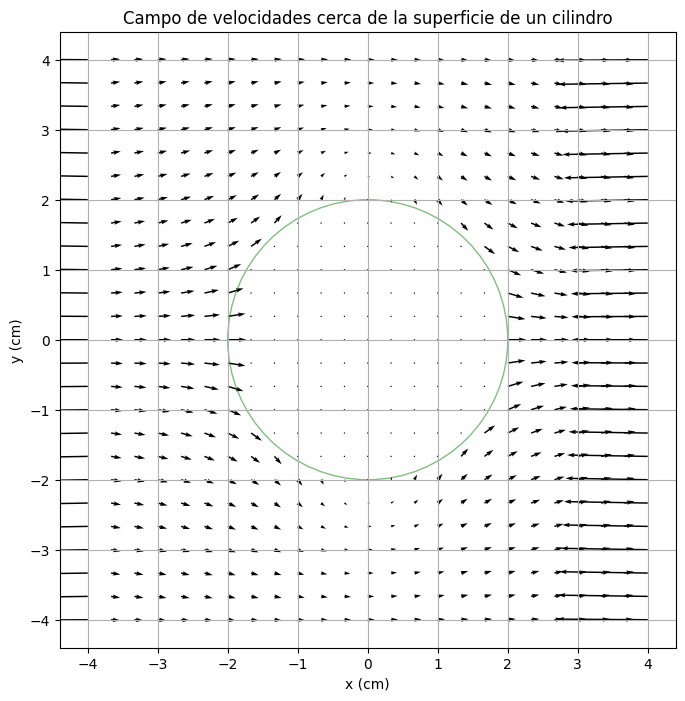

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# a) Definir la discretización en los ejes x y y
N = 25
x = np.linspace(-4, 4, N)
y = np.linspace(-4, 4, N)
X, Y = np.meshgrid(x, y)

# b) Definir la función potencial del flujo
R = 2  # radio del cilindro en cm
V = 2  # velocidad en cm/s

def potencial_flujo(X, Y, V, R):
    return V * X * (1 - (R**2) / (X**2 + Y**2))

phi = potencial_flujo(X, Y, V, R)


# c) Calcular el campo de velocidades usando la derivada parcial central
h = 0.001

# Derivadas parciales usando diferencia central
def derivada_central(f, h):
    df_dx = (np.roll(f, -1, axis=1) - np.roll(f, 1, axis=1)) / (2 * h)
    df_dy = (np.roll(f, -1, axis=0) - np.roll(f, 1, axis=0)) / (2 * h)
    return df_dx, -df_dy

Vx, Vy = derivada_central(phi, h)


# Establecer el campo de velocidades dentro del cilindro a cero
inside_cylinder = X**2 + Y**2 < R**2
Vx[inside_cylinder] = 0
Vy[inside_cylinder] = 0

# d) Dibujar el campo de velocidades
plt.figure(figsize=(8, 8))
plt.quiver(X, Y, Vx, Vy)
circle = plt.Circle((0, 0), R, color='green', fill=False, alpha=0.5)
plt.gca().add_patch(circle)
plt.title("Campo de velocidades cerca de la superficie de un cilindro")
plt.xlabel("x (cm)")
plt.ylabel("y (cm)")
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

phi_array = phi
Vx_array = Vx
Vy_array = Vy

np.save('phi_array.npy', phi_array)
np.save('Vx_array.npy', Vx_array)
np.save('Vy_array.npy', Vy_array)
